In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv('Iris.csv', header=0, names=column_names)

In [3]:
# 1. Data Preprocessing (Minimal for this dataset)

# Separate features (X) and target (y)
X = df.drop('class', axis=1)
y = df['class']

# Encode the target variable (class names to numerical)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [4]:
# 2. Data Partitioning

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

In [6]:
# 3. Implement Boosting Ensemble Method (AdaBoost)

# Initialize the base estimator (typically a weak learner, like a decision tree with max_depth=1)
base_estimator = DecisionTreeClassifier(max_depth=1)

# Initialize the AdaBoost Classifier
# base_estimator: The algorithm to use as the base learner
# n_estimators: The number of weak learners to train
# learning_rate: Contributes to the weights of weak learners in the final combination
# random_state: For reproducibility
model = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42, estimator=base_estimator) # Changed base_estimator to estimator

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

Accuracy of the AdaBoost ensemble method: 1.00

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



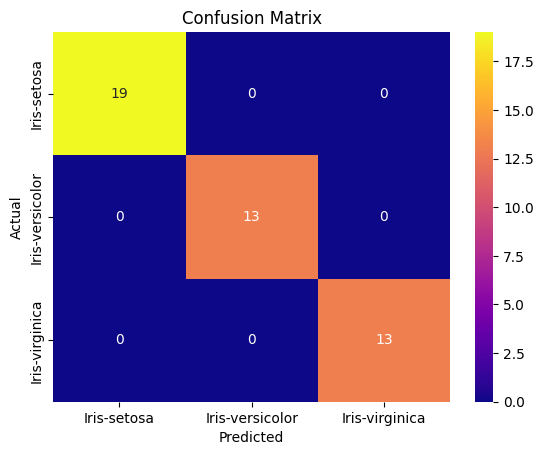

In [7]:
# 4. Model Evaluation

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the AdaBoost ensemble method: {accuracy:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='plasma',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()